In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [4]:
from DataCollapse import *

In [ ]:
# from importlib import reload


# import data_collapse
# reload(data_collapse)
# from data_collapse import *

# Generate pseudo data

In [47]:
def generate_pseudo_data(pc=0.5,p_list=np.round(np.linspace(0.45,.55,11),2),nu=1,L_list=np.arange(10,20,2),beta=0.5, f=lambda x: (1-x)**(1/2),seed=0, epsilon=0.01,N=100):
    """Generate pseudo data following y~L^{-beta/nu} f[(p-p_c)L^{1/nu}] + epsilon, where epsilon is a random noise, N is the sample size"""
    rng=np.random.default_rng(seed)
    data_dict={(p,L): L**(-beta/nu)*f((p-pc)* L **(1/nu))+ rng.normal(0,epsilon,N) for L in L_list for p in p_list}
    index = pd.MultiIndex.from_tuples([key for key in data_dict.keys() if key!='fn'], names=['p','L'])
    df = pd.DataFrame({'observations': data_dict.values()}, index=index)
    return df
    

In [49]:
# Generate psudo data with p_c=0.5, nu=1, beta=0.5
df=generate_pseudo_data(pc=0.5,nu=1,beta=0.5)

# Plot data

Text(0, 0.5, 'y')

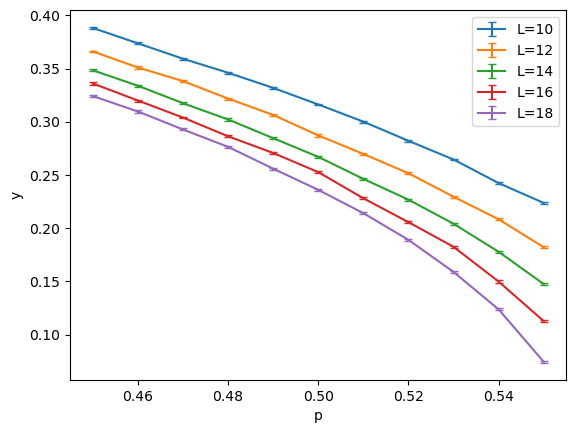

In [65]:
fig,ax=plt.subplots()
L_list = np.arange(10,20,2)
p_list=np.round(np.linspace(0.45,.55,11),2)
for L in L_list:
    df_=df.xs(L,level='L')['observations']
    y=df_.apply(np.mean)
    yerr=df_.apply(np.std)/np.sqrt(df_.apply(len))
    ax.errorbar(p_list, y,yerr, label=f'L={L}',capsize=3)
ax.legend()
ax.set_xlabel('p')
ax.set_ylabel('y')

# Finite size scaling

In [51]:
dc=DataCollapse(df, p_='p',L_='L',params={},p_range=[0.45,0.55],)

In [59]:
dc.datacollapse(p_c=0.505,nu=1.3,beta=0.0,p_c_vary=True,beta_vary=True,nu_vary=True)

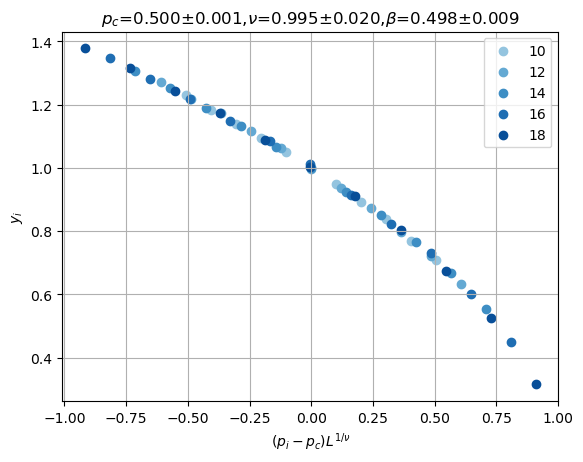

In [60]:
dc.plot_data_collapse()

# reproduce the critical exponents 